In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import statsmodels
from scipy.stats import shapiro
from statsmodels.stats.anova import AnovaRM
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import itertools

colorDic = {'blue' : '#6599FF', 'yellow' :'#FFAD33', 'green' : '#198D6D',  'purple': '#683B96', 'red' : '#FF523F', 'orange': '#F97306', 'cyan': '#00FFFF', 'pink': '#FF81C0', 'lime': '#AAFF32', 'brown': '#653700'}
colors = list(colorDic.values())

In [5]:
li = []
path = 'Data/Pilot-Study'
# all_files = glob.glob(os.path.join(path , "/*.csv"))

all_files = glob.glob(path + '/*.csv')
ids = np.arange(len(all_files))

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, names=['startPause', 'activeScene', 'textFile', 'calculationMethod', 'backgroundColor', 'speed', 'phase', 'pupilDilation_L', 'pupilDilation_R', 'gazePosition_X', 'gazePosition_Y', 'gazePosition_Z'])
    li.append(df)

frame = pd.concat(li, keys=ids, axis=0).reset_index()
frame = frame.rename(columns = {'level_0':'pid', 'level_1':'pid_sample'})

In [6]:
frame

,pid,pid_sample,startPause,activeScene,textFile,calculationMethod,backgroundColor,speed,phase,pupilDilation_L,pupilDilation_R,gazePosition_X,gazePosition_Y,gazePosition_Z
0,0,0,15,NormalReading,l,A,W,0,calibration,0.000000,0.000000,(0.00,0.00,0.00)
1,0,1,15,NormalReading,l,A,W,0,calibration,4.854706,4.744507,(0.00,0.00,0.00)
2,0,2,15,NormalReading,l,A,W,0,calibration,5.061356,4.803085,(4.68,-18.22,90.00)
3,0,3,15,NormalReading,j,A,W,0,calibration,0.000000,0.000000,(0.00,0.00,0.00)
4,0,4,15,NormalReading,j,A,W,0,calibration,4.489090,4.358307,(0.00,0.00,0.00)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347178,6,48245,15,RSVP,g,A,W,200,finished,2.413620,2.652298,(-3.65,-0.28,40.00)
347179,6,48246,15,RSVP,g,A,W,200,finished,2.410217,2.648087,(-3.67,-0.35,40.00)
347180,6,48247,15,RSVP,g,A,W,200,finished,2.413528,2.636536,(-3.97,-0.56,40.00)
347181,6,48248,15,RSVP,g,A,W,200,finished,2.430923,2.621841,(-3.96,-0.54,40.00)


In [7]:
frame['gazePosition_X'] = frame.gazePosition_X.apply(lambda x: x.replace('(', ''))
frame['gazePosition_Z'] = frame.gazePosition_Z.apply(lambda x: x.replace(')', ''))

In [8]:
frame

,pid,pid_sample,startPause,activeScene,textFile,calculationMethod,backgroundColor,speed,phase,pupilDilation_L,pupilDilation_R,gazePosition_X,gazePosition_Y,gazePosition_Z
0,0,0,15,NormalReading,l,A,W,0,calibration,0.000000,0.000000,0.00,0.00,0.00
1,0,1,15,NormalReading,l,A,W,0,calibration,4.854706,4.744507,0.00,0.00,0.00
2,0,2,15,NormalReading,l,A,W,0,calibration,5.061356,4.803085,4.68,-18.22,90.00
3,0,3,15,NormalReading,j,A,W,0,calibration,0.000000,0.000000,0.00,0.00,0.00
4,0,4,15,NormalReading,j,A,W,0,calibration,4.489090,4.358307,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347178,6,48245,15,RSVP,g,A,W,200,finished,2.413620,2.652298,-3.65,-0.28,40.00
347179,6,48246,15,RSVP,g,A,W,200,finished,2.410217,2.648087,-3.67,-0.35,40.00
347180,6,48247,15,RSVP,g,A,W,200,finished,2.413528,2.636536,-3.97,-0.56,40.00
347181,6,48248,15,RSVP,g,A,W,200,finished,2.430923,2.621841,-3.96,-0.54,40.00


In [9]:
plotting = frame.groupby(['pid', 'speed', 'phase', 'backgroundColor']).apply(lambda x: np.mean(np.hstack(np.mean([x.pupilDilation_L, x.pupilDilation_R], axis=0))))
frame_plotting = pd.DataFrame(plotting).reset_index()
frame_plotting.columns = ["PID", "Speed", 'Phase', "backgroundColor", "PupilDilation"]
frame_plotting.replace('B', 0, inplace=True)
frame_plotting.replace('G', 1, inplace=True)
frame_plotting.replace('W', 2, inplace=True)
frame_plotting.replace('finished', 'calibration', inplace=True)

/var/folders/bd/mx6j448x6_58m90xxtw79fz00000gn/T/ipykernel_89115/990400503.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plotting = frame.groupby(['pid', 'speed', 'phase', 'backgroundColor']).apply(lambda x: np.mean(np.hstack(np.mean([x.pupilDilation_L, x.pupilDilation_R], axis=0))))
/var/folders/bd/mx6j448x6_58m90xxtw79fz00000gn/T/ipykernel_89115/990400503.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frame_plotting.replace('W', 2, inplace=True)


In [10]:
frame_plotting

,PID,Speed,Phase,backgroundColor,PupilDilation
0,0,0,calibration,0,5.669929
1,0,0,calibration,1,2.918205
2,0,0,calibration,2,2.517970
3,0,0,test,0,4.695051
4,0,0,test,1,3.096528
...,...,...,...,...,...
217,6,500,calibration,1,3.037766
218,6,500,calibration,2,2.447424
219,6,500,test,0,3.724553
220,6,500,test,1,3.029150


# Absolute Results

/var/folders/bd/mx6j448x6_58m90xxtw79fz00000gn/T/ipykernel_89115/461196717.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Black', 'Gray', 'White'])


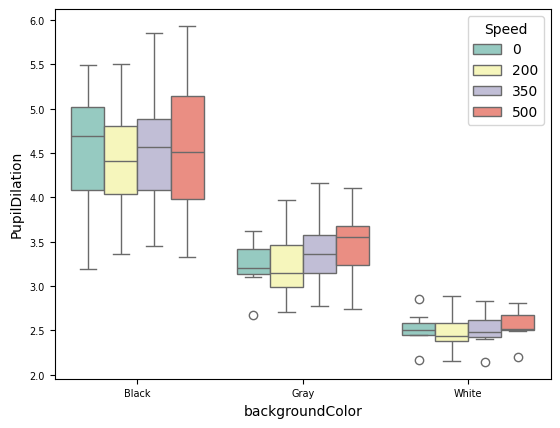

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.tick_params(axis='both', which='major', labelsize=7)
g = sns.boxplot(x="backgroundColor", y="PupilDilation", hue="Speed", data=frame_plotting.loc[frame_plotting['Phase'] == 'test'], palette="Set3")
g.set_xticklabels(['Black', 'Gray', 'White'])
plt.show()

In [15]:
import pingouin as pg
res = pg.rm_anova(dv='PupilDilation', within=['Speed'], subject='PID', 
                  data=frame_plotting.loc[(frame_plotting['backgroundColor'] == 0) & (frame_plotting['Phase'] == 'test')], detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Speed,0.092454,3,0.030818,0.725758,0.549772,0.005713,0.584983
1,Error,0.764335,18,0.042463,NaN,NaN,NaN,NaN


In [22]:
import pingouin as pg
res = pg.rm_anova(dv='PupilDilation', within=['Speed'], subject='PID', 
                  data=frame_plotting.loc[(frame_plotting['backgroundColor'] == 1) & (frame_plotting['Phase'] == 'test')], detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Speed,0.262113,3,0.087371,4.40531,0.017202,0.059767,0.625396
1,Error,0.356996,18,0.019833,NaN,NaN,NaN,NaN


In [23]:
import pingouin as pg
res = pg.rm_anova(dv='PupilDilation', within=['Speed'], subject='PID', 
                  data=frame_plotting.loc[(frame_plotting['backgroundColor'] == 2) & (frame_plotting['Phase'] == 'test')], detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Speed,0.016492,3,0.005497,2.572796,0.086099,0.013693,0.860742
1,Error,0.038462,18,0.002137,NaN,NaN,NaN,NaN


In [24]:
post_hocs = pg.pairwise_tests(dv='PupilDilation', within=['Speed'], subject='PID', padjust='bonf', data=frame_plotting.loc[(frame_plotting['backgroundColor'] == 0) & (frame_plotting['Phase'] == 'test')])
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Speed,0,200,True,True,0.923063,6.0,two-sided,0.391583,1.000000,bonf,0.494,0.110356
1,Speed,0,350,True,True,-0.204217,6.0,two-sided,0.844935,1.000000,bonf,0.359,-0.036110
2,Speed,0,500,True,True,-0.447368,6.0,two-sided,0.670306,1.000000,bonf,0.384,-0.067259
3,Speed,200,350,True,True,-1.979079,6.0,two-sided,0.095145,0.570872,bonf,1.244,-0.148109
4,Speed,200,500,True,True,-1.620975,6.0,two-sided,0.156150,0.936900,bonf,0.88,-0.172048
5,Speed,350,500,True,True,-0.342544,6.0,two-sided,0.743623,1.000000,bonf,0.371,-0.033705


In [25]:
post_hocs = pg.pairwise_tests(dv='PupilDilation', within=['Speed'], subject='PID', padjust='bonf', data=frame_plotting.loc[(frame_plotting['backgroundColor'] == 1) & (frame_plotting['Phase'] == 'test')])
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Speed,0,200,True,True,-0.276219,6.0,two-sided,0.791648,1.000000,bonf,0.365,-0.045041
1,Speed,0,350,True,True,-1.821579,6.0,two-sided,0.118361,0.710167,bonf,1.066,-0.389395
2,Speed,0,500,True,True,-2.608827,6.0,two-sided,0.040184,0.241101,bonf,2.334,-0.555403
3,Speed,200,350,True,True,-2.026954,6.0,two-sided,0.089039,0.534232,bonf,1.304,-0.305076
4,Speed,200,500,True,True,-2.429020,6.0,two-sided,0.051231,0.307384,bonf,1.949,-0.451875
5,Speed,350,500,True,True,-1.753485,6.0,two-sided,0.130062,0.780372,bonf,0.998,-0.143344


In [26]:
post_hocs = pg.pairwise_tests(dv='PupilDilation', within=['Speed'], subject='PID', padjust='bonf', data=frame_plotting.loc[(frame_plotting['backgroundColor'] == 2) & (frame_plotting['Phase'] == 'test')])
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Speed,0,200,True,True,1.069626,6.0,two-sided,0.325918,1.000000,bonf,0.549,0.114003
1,Speed,0,350,True,True,0.320444,6.0,two-sided,0.759498,1.000000,bonf,0.369,0.031267
2,Speed,0,500,True,True,-1.615101,6.0,two-sided,0.157416,0.944496,bonf,0.876,-0.175567
3,Speed,200,350,True,True,-0.816026,6.0,two-sided,0.445665,1.000000,bonf,0.461,-0.080824
4,Speed,200,500,True,True,-2.235485,6.0,two-sided,0.066760,0.400562,bonf,1.605,-0.276296
5,Speed,350,500,True,True,-2.396085,6.0,two-sided,0.053580,0.321480,bonf,1.886,-0.199550


# Relative Data

In [27]:
frame_plotting

,PID,Speed,Phase,backgroundColor,PupilDilation
0,0,0,calibration,0,5.669929
1,0,0,calibration,1,2.918205
2,0,0,calibration,2,2.517970
3,0,0,test,0,4.695051
4,0,0,test,1,3.096528
...,...,...,...,...,...
217,6,500,calibration,1,3.037766
218,6,500,calibration,2,2.447424
219,6,500,test,0,3.724553
220,6,500,test,1,3.029150


In [28]:
df_sub = frame_plotting[frame_plotting['PID'] == 0]
df_sub

,PID,Speed,Phase,backgroundColor,PupilDilation
0,0,0,calibration,0,5.669929
1,0,0,calibration,1,2.918205
2,0,0,calibration,2,2.517970
3,0,0,test,0,4.695051
4,0,0,test,1,3.096528
5,0,0,test,2,2.518340
6,0,200,calibration,0,5.256292
7,0,200,calibration,1,2.695329
8,0,200,calibration,2,2.428306
9,0,200,test,0,4.380485


In [29]:
## Remove the first 5 seconds at the start of each trial to allow for the pupil to stabalize
import tqdm

lst = []
for pid in tqdm.tqdm(sorted(frame.pid.unique())):
    for speed in sorted(frame.speed.unique()):
        for phase in sorted(frame.phase.unique()):
            dfX = frame[(frame.pid == pid) & (frame.speed == speed) & (frame.phase == phase)]
            dfX = dfX.iloc[450:]
            lst.append(dfX)

frame_X = pd.concat(lst)

lst = []
for pid in tqdm.tqdm(sorted(frame_X.pid.unique())):
    for speed in sorted(frame_X.speed.unique()):
        for phase in sorted(frame_X.phase.unique()):
            for color in sorted(frame_X.backgroundColor.unique()):
                dfX = frame_X[(frame_X.pid == pid) & (frame_X.speed == speed) & (frame_X.phase == phase) & (frame_X.backgroundColor == color)]
                lower = dfX.pupilDilation_L.mean() - dfX.pupilDilation_L.std() * 3
                upper = dfX.pupilDilation_L.mean() + dfX.pupilDilation_L.std() * 3
                dfY = dfX[(dfX.pupilDilation_L > lower) & (dfX.pupilDilation_L < upper)]
                lst.append([pid, color, speed, phase, dfY.pupilDilation_L.mean()])
frame_plotting = pd.DataFrame(lst)
frame_plotting.columns = ["PID", 'Color', "Speed", 'Phase', "PupilDilation"]

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.64it/s]


In [30]:
frame_plotting

,PID,Color,Speed,Phase,PupilDilation
0,0,B,0,calibration,5.750102
1,0,G,0,calibration,2.954236
2,0,W,0,calibration,2.482734
3,0,B,0,finished,NaN
4,0,G,0,finished,NaN
...,...,...,...,...,...
247,6,G,500,finished,2.864819
248,6,W,500,finished,NaN
249,6,B,500,test,3.712914
250,6,G,500,test,2.936774


In [32]:
dfZ = pd.DataFrame()
lst_df = []
lst_value = []
lst_baseline = []


for pid in frame_plotting.PID.unique():
    dfX = frame_plotting[frame_plotting['PID'] == pid]
    for speed in dfX.Speed.unique():
        dfY = dfX[dfX.Speed == speed]
        for color in dfY.Color.unique():
            dfZ = dfY[dfY.Color == color]
            baseline = dfZ[dfZ.Phase == 'calibration'].reset_index()
            lst_baseline.append(baseline)
            value = dfZ[dfZ.Phase == 'test'].reset_index()
            lst_value.append(value)
            value['rel_PupilDilation'] = value.PupilDilation - baseline.PupilDilation
            lst_df.append(value)
        
df = pd.concat(lst_df)

In [33]:
df

,index,PID,Color,Speed,Phase,PupilDilation,rel_PupilDilation
0,6,0,B,0,test,4.824123,-0.925978
0,7,0,G,0,test,3.163513,0.209277
0,8,0,W,0,test,2.565185,0.082451
0,15,0,B,200,test,4.487651,-0.820874
0,16,0,G,200,test,3.012646,0.336294
...,...,...,...,...,...,...,...
0,241,6,G,350,test,2.884749,0.030868
0,242,6,W,350,test,2.316059,-0.074771
0,249,6,B,500,test,3.712914,-0.661439
0,250,6,G,500,test,2.936774,0.087228


In [34]:
lstValues = []
lstFreqs = []
lstTicks = ['0', '200', '350', '500', 'W', 'G', 'B']

for f in sorted(df.Speed.values):
    df2 = df[df.Speed == f]
    lstValues.append(df2.rel_PupilDilation.values)
    lstFreqs.append(f)

for c in sorted(df.Color.values):
    df2 = df[df.Color == c]    
    lstValues.append(df2.rel_PupilDilation.values)
    lstFreqs.append(c)

dfX = pd.DataFrame([lstFreqs, lstValues]).swapaxes('index', 'columns')
dfX.columns = ['Tick', 'Values']
testX = dfX.groupby(['Tick']).apply(lambda x: np.hstack(x.Values))
dfY = pd.DataFrame(testX).reset_index()
dfY.columns = ['Tick', 'Values']

# dfY = dfY.sort_values('Speed', ascending=True)
lstTicks = dfY['Tick'].values
lstValues = dfY['Values'].values

/var/folders/bd/mx6j448x6_58m90xxtw79fz00000gn/T/ipykernel_89115/908054322.py:15: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  dfX = pd.DataFrame([lstFreqs, lstValues]).swapaxes('index', 'columns')
/var/folders/bd/mx6j448x6_58m90xxtw79fz00000gn/T/ipykernel_89115/908054322.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  testX = dfX.groupby(['Tick']).apply(lambda x: np.hstack(x.Values))


[array([-0.92597849,  0.20927672,  0.08245132, -0.58266124, -0.18858499,
        -0.14571664, -1.15550084,  0.24773664,  0.00937697, -0.6191161 ,
         0.05679153, -0.03517856, -1.1543412 ,  0.14974078,  0.01862312,
        -0.38250796,  0.21447396, -0.03722386, -0.48906948,  0.16022043,
        -0.04416516, -0.92597849,  0.20927672,  0.08245132, -0.58266124,
        -0.18858499, -0.14571664, -1.15550084,  0.24773664,  0.00937697,
        -0.6191161 ,  0.05679153, -0.03517856, -1.1543412 ,  0.14974078,
         0.01862312, -0.38250796,  0.21447396, -0.03722386, -0.48906948,
         0.16022043, -0.04416516, -0.92597849,  0.20927672,  0.08245132,
        -0.58266124, -0.18858499, -0.14571664, -1.15550084,  0.24773664,
         0.00937697, -0.6191161 ,  0.05679153, -0.03517856, -1.1543412 ,
         0.14974078,  0.01862312, -0.38250796,  0.21447396, -0.03722386,
        -0.48906948,  0.16022043, -0.04416516, -0.92597849,  0.20927672,
         0.08245132, -0.58266124, -0.18858499, -0.1

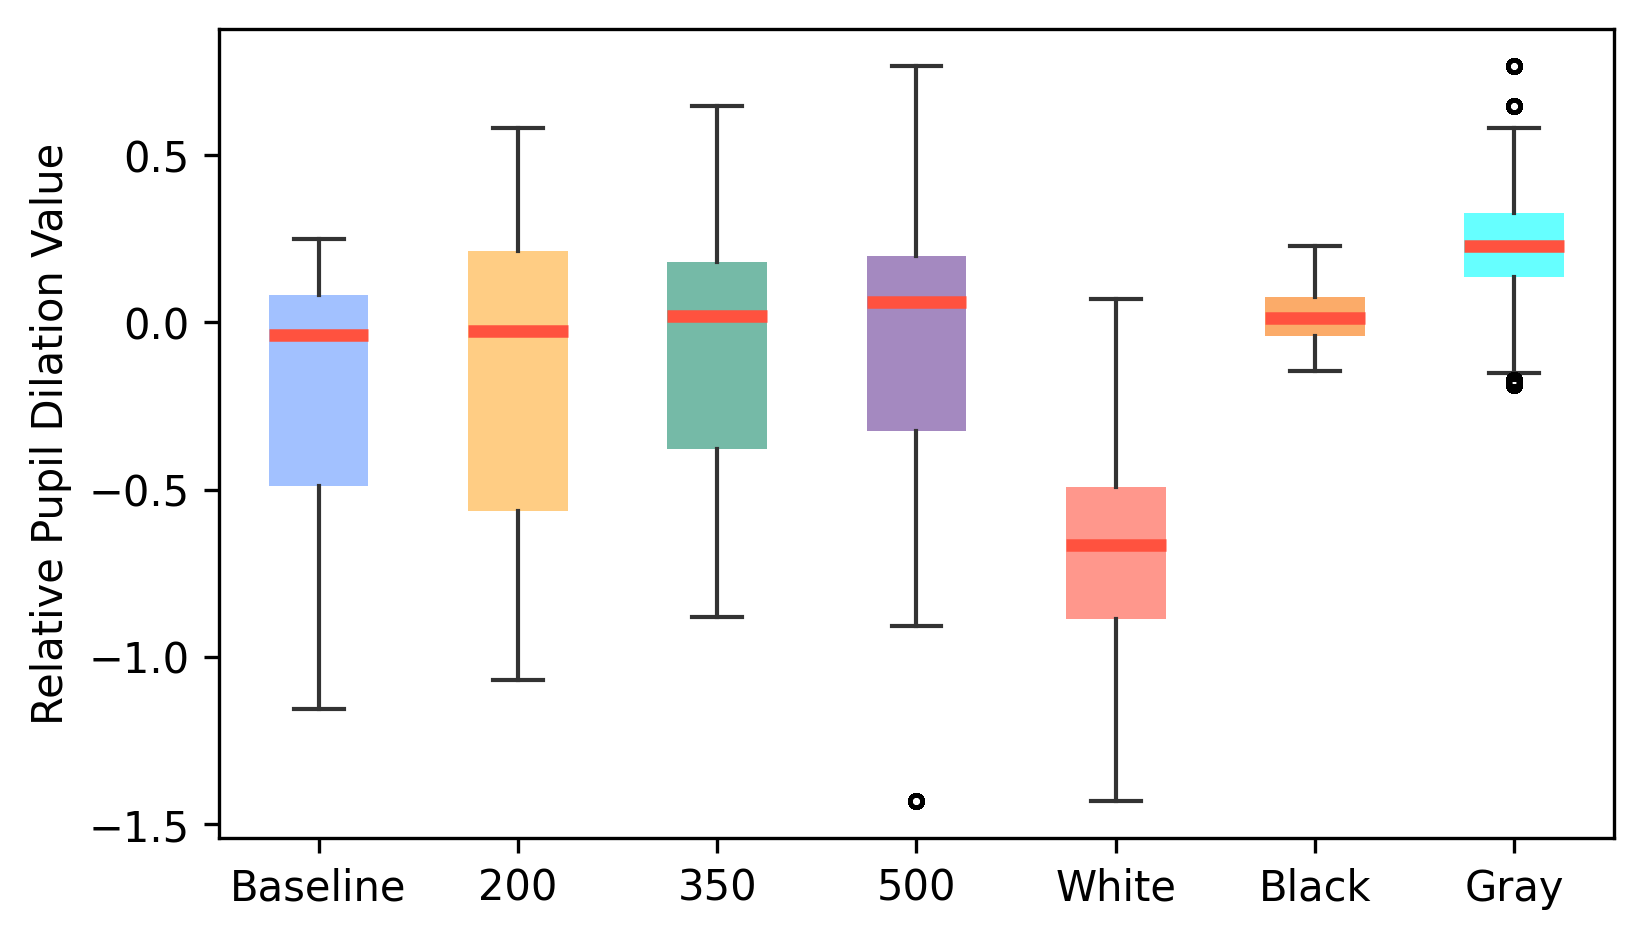

In [35]:
lstTicks = ['0', '200', '350', '500', 'W', 'G', 'B']
# reorder list
print(lstValues)
newOrder = [0, 1, 2, 3, 4, 6, 5]
lstValues = [lstValues[i] for i in newOrder]

lstTicks = ['Baseline', '200', '350', '500', 'White', 'Black', 'Gray']

fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Relative Pupil Dilation Value')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)

plt.savefig('./figures/pilot_relPupil_overall.pdf')
plt.show()

In [69]:
len(lstValues)

4

In [36]:
df.to_csv('./Data/Pilot-Study/merged.csv')

In [64]:
df

,index,PID,Color,Speed,Phase,PupilDilation,rel_PupilDilation
0,6,0,B,0,test,4.824123,-0.925978
0,7,0,G,0,test,3.163513,0.209277
0,8,0,W,0,test,2.565185,0.082451
0,15,0,B,200,test,4.487651,-0.820874
0,16,0,G,200,test,3.012646,0.336294
...,...,...,...,...,...,...,...
0,241,6,G,350,test,4.052304,0.324437
0,242,6,W,350,test,2.776065,0.018828
0,249,6,B,500,test,5.359790,-0.736850
0,250,6,G,500,test,4.043851,0.488719


In [17]:
dfZ = pd.DataFrame()
lst_df = []
lst_value = []
lst_baseline = []

for pid in frame_plotting.PID.unique():
    for color in frame_plotting[frame_plotting['PID'] == pid].backgroundColor.unique():
        dfX = frame_plotting[frame_plotting.backgroundColor == color]
        for speed in dfX.Speed.unique():
            dfY = dfX[dfX.Speed == speed]
            baseline = dfY[dfY.Phase == 'calibration'].reset_index()
            lst_baseline.append(baseline)
            value = dfY[dfY.Phase == 'test'].reset_index()
            lst_value.append(value)
            value['rel_PupilDilation'] = value.PupilDilation - baseline.PupilDilation
            lst_df.append(value)

In [18]:
len(lst_baseline)

84

In [19]:
len(lst_value)

84

In [20]:
df = pd.concat(lst_df)

In [30]:
df.backgroundColor.unique()

array([0, 1, 2], dtype=int64)

In [29]:
df.to_csv('./Data/Pilot-Study/merged.csv')

c:\Users\jesse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jesse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jesse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jesse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

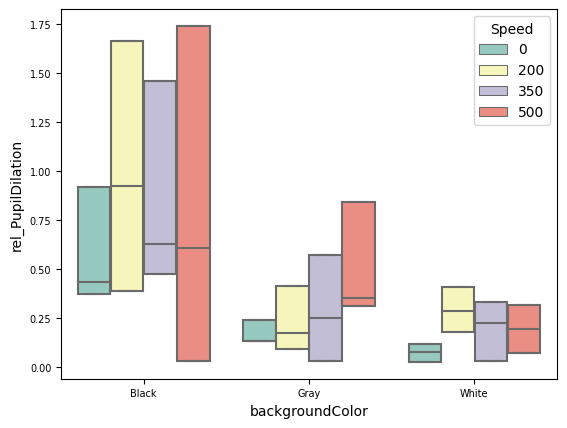

In [21]:
plt.tick_params(axis='both', which='major', labelsize=7)
g = sns.boxplot(x="backgroundColor", y="rel_PupilDilation", hue="Speed", data=df.loc[frame_plotting['Phase'] == 'test'], palette="Set3")
g.set_xticklabels(['Black', 'Gray', 'White'])
plt.show()

In [22]:
import pingouin as pg
res = pg.rm_anova(dv='rel_PupilDilation', within=['Speed'], subject='PID', 
                  data=df.loc[(df['backgroundColor'] == 0) & (df['Phase'] == 'test')], detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Speed,0.175084,3,0.058361,0.860891,0.479247,0.030046,0.687487
1,Error,1.220249,18,0.067792,NaN,NaN,NaN,NaN


In [23]:
import pingouin as pg
res = pg.rm_anova(dv='rel_PupilDilation', within=['Speed'], subject='PID', 
                  data=df.loc[(df['backgroundColor'] == 1) & (df['Phase'] == 'test')], detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Speed,0.159908,3,0.053303,1.089667,0.378821,0.077398,0.457049
1,Error,0.880499,18,0.048917,NaN,NaN,NaN,NaN


In [24]:
import pingouin as pg
res = pg.rm_anova(dv='rel_PupilDilation', within=['Speed'], subject='PID', 
                  data=df.loc[(df['backgroundColor'] == 2) & (df['Phase'] == 'test')], detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Speed,0.081043,3,0.027014,3.370224,0.041422,0.181982,0.422552
1,Error,0.144280,18,0.008016,NaN,NaN,NaN,NaN


In [25]:
post_hocs = pg.pairwise_tests(dv='rel_PupilDilation', within=['Speed'], subject='PID', padjust='bonf', data=df.loc[(df['backgroundColor'] == 2) & (df['Phase'] == 'test')])
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Speed,0,200,True,True,-2.100726,6.0,two-sided,0.080397,0.482381,bonf,1.403,-1.033617
1,Speed,0,350,True,True,-1.045661,6.0,two-sided,0.336003,1.000000,bonf,0.539,-0.504584
2,Speed,0,500,True,True,-1.344694,6.0,two-sided,0.227327,1.000000,bonf,0.686,-0.577354
3,Speed,200,350,True,True,2.896539,6.0,two-sided,0.027458,0.164749,bonf,3.105,0.649819
4,Speed,200,500,True,True,3.313627,6.0,two-sided,0.016132,0.096790,bonf,4.65,0.569729
5,Speed,350,500,True,True,-0.752845,6.0,two-sided,0.480028,1.000000,bonf,0.444,-0.087617
